#IMPORTS

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore')
print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.19.0


DATA EXTRACTION AND DATA ANALYSIS

In [7]:
df = pd.read_csv(r"C:\Users\Arnav\Documents\python\MLCOE\Restaurant_revenue (1).csv")
print("Dataset was loaded successfully")
print(f"Shape: {df.shape}")
df.head()
print("Dataset Information:")
print(df.info())
print("\nBasic Statistics:")
df.describe()

Dataset was loaded successfully
Shape: (1000, 8)
Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Number_of_Customers        1000 non-null   int64  
 1   Menu_Price                 1000 non-null   float64
 2   Marketing_Spend            1000 non-null   float64
 3   Cuisine_Type               1000 non-null   object 
 4   Average_Customer_Spending  1000 non-null   float64
 5   Promotions                 1000 non-null   int64  
 6   Reviews                    1000 non-null   int64  
 7   Monthly_Revenue            1000 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 62.6+ KB
None

Basic Statistics:


,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,53.271000,30.219120,9.958726,29.477085,0.497000,49.837000,268.724172
std,26.364914,11.278760,5.845586,11.471686,0.500241,29.226334,103.982950
min,10.000000,10.009501,0.003768,10.037177,0.000000,0.000000,-28.977809
25%,30.000000,20.396828,4.690724,19.603041,0.000000,24.000000,197.103642
50%,54.000000,30.860614,10.092047,29.251365,0.000000,50.000000,270.213964
75%,74.000000,39.843868,14.992436,39.553220,1.000000,76.000000,343.395793
max,99.000000,49.974140,19.994276,49.900725,1.000000,99.000000,563.381332


#Graphs and Visualisations

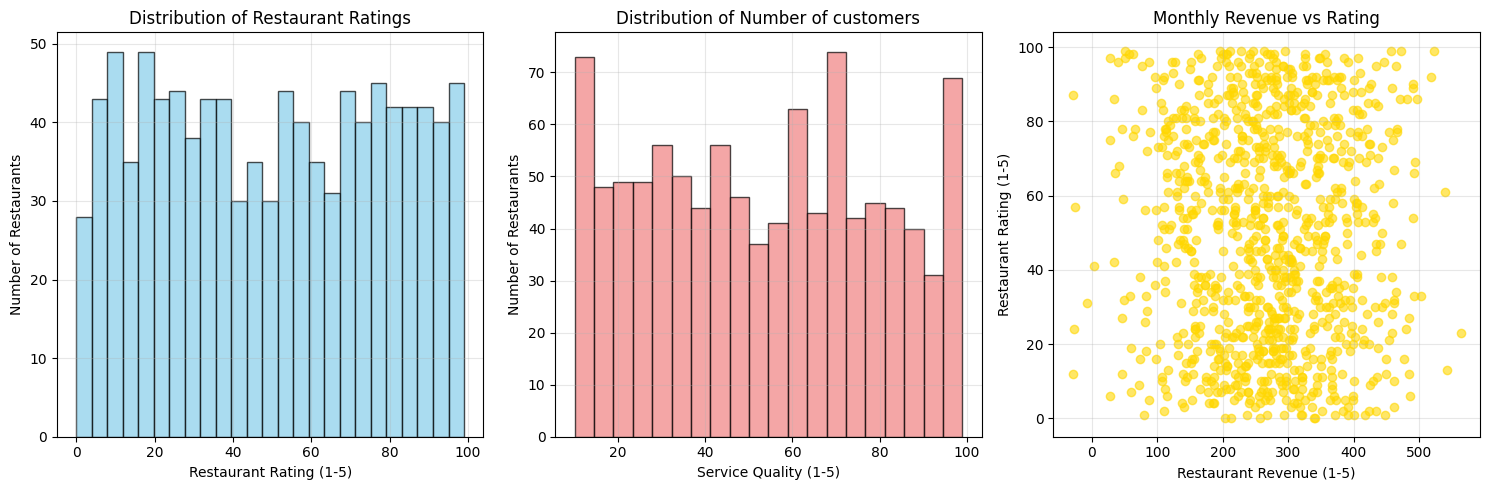

In [24]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['Reviews'], bins=25, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Restaurant Rating (1-5)')
plt.ylabel('Number of Restaurants')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.hist(df['Number_of_Customers'], bins=20, color='lightcoral', edgecolor='black', alpha=0.7)
plt.title('Distribution of Number of customers')
plt.xlabel('Service Quality (1-5)')
plt.ylabel('Number of Restaurants')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.scatter(df['Monthly_Revenue'], df['Reviews'], alpha=0.6, color='gold')
plt.title('Monthly Revenue vs Rating')
plt.xlabel('Restaurant Revenue (1-5)')
plt.ylabel('Restaurant Rating (1-5)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Create New Features

In [ ]:
df_features = df.copy()

# Feature 1: Overall quality score (combination of food and service)
df_features['overall_quality'] = (df_features['Food_Quality'] + df_features['Service_Quality']) / 2
print("✓ Created overall_quality feature")

# Feature 2: Value for money (spending vs price ratio)
df_features['value_for_money'] = df_features['Average_Customer_Spending'] / (df_features['Menu_Price'] + 1)
print("✓ Created value_for_money feature")

# Feature 3: Customer loyalty indicator (customers vs spending)
df_features['customer_loyalty'] = df_features['Number_of_Customers'] * np.log1p(df_features['Average_Customer_Spending'])
print("✓ Created customer_loyalty feature")

# Feature 4: Service efficiency (customers served per service quality point)
df_features['service_efficiency'] = df_features['Number_of_Customers'] / (df_features['Service_Quality'] + 1)
print("✓ Created service_efficiency feature")

# Feature 5: Food value score (food quality vs menu price)
df_features['food_value_score'] = df_features['Food_Quality'] / (df_features['Menu_Price'] / 10 + 1)
print("✓ Created food_value_score feature")

# Feature 6: Promotion effectiveness on quality
df_features['promotion_quality_boost'] = df_features['Promotions'] * df_features['overall_quality']
print("✓ Created promotion_quality_boost feature")

# Feature 7: Revenue per customer (business success indicator)
df_features['revenue_per_customer'] = df_features['Monthly_Revenue'] / (df_features['Number_of_Customers'] + 1)
print("✓ Created revenue_per_customer feature")

# Feature 8: Marketing effectiveness
df_features['marketing_per_customer'] = df_features['Marketing_Spend'] / (df_features['Number_of_Customers'] + 1)
print("✓ Created marketing_per_customer feature")

# Feature 9: Quality consistency score
df_features['quality_consistency'] = 5 - abs(df_features['Food_Quality'] - df_features['Service_Quality'])
print("✓ Created quality_consistency feature")

print(f"\nNew dataset shape: {df_features.shape}")
print("New features created successfully!")

# Cell 8: Prepare features for training
print("=== PREPARING FEATURES FOR RATING PREDICTION ===")

# Select features for training (excluding target variable)
feature_columns = [
    'Number_of_Customers', 'Menu_Price', 'Marketing_Spend', 
    'Average_Customer_Spending', 'Promotions', 'Monthly_Revenue',
    'Service_Quality', 'Food_Quality', 'overall_quality', 
    'value_for_money', 'customer_loyalty', 'service_efficiency',
    'food_value_score', 'promotion_quality_boost', 'revenue_per_customer',
    'marketing_per_customer', 'quality_consistency'
]

X = df_features[feature_columns]
y = df_features['Restaurant_Rating']  # TARGET: Restaurant Rating

print(f"Features selected: {len(feature_columns)}")
print("Feature names:", feature_columns)
print(f"Target variable: Restaurant_Rating")


✓ Created customer_engagement feature
✓ Created revenue_per_customer feature
✓ Created marketing_efficiency feature
✓ Created price_premium feature
✓ Created promotion_boost feature
✓ Created satisfaction_score feature
✓ Created business_size feature
✓ Created total_customer_value feature

New dataset shape: (1000, 16)
New features created successfully!
=== PREPARING FEATURES FOR TRAINING ===
Features selected: 14
Feature names: ['Number_of_Customers', 'Menu_Price', 'Marketing_Spend', 'Average_Customer_Spending', 'Promotions', 'Reviews', 'customer_engagement', 'revenue_per_customer', 'marketing_efficiency', 'price_premium', 'promotion_boost', 'satisfaction_score', 'business_size', 'total_customer_value']
Target variable: Monthly_Revenue


Train-test split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data scaled successfully")

Training set size: (800, 14)
Test set size: (200, 14)
Data scaled successfully


Random Forest CLassifier and Feature Importance

In [ ]:
rf_model = RandomForestRegressor(
    n_estimators=150,
    random_state=42,
    max_depth=12,
    min_samples_split=3,
    min_samples_leaf=2)

rf_model.fit(X_train, y_train)
print("Random Forest model trained")

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Clip predictions to valid rating range (1-5)
rf_predictions = np.clip(rf_predictions, 1, 5)

# Calculate metrics
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print(f"Random Forest Results:")
print(f"RMSE: {rf_rmse:.4f}")
print(f"MAE: {rf_mae:.4f}")
print(f"R² Score: {rf_r2:.4f}")

# Cell 11: Feature importance analysis for rating prediction
print("=== FEATURE IMPORTANCE ANALYSIS FOR RATING PREDICTION ===")

# Get feature importance
feature_importance = rf_model.feature_importances_
importance_df = pd.DataFrame({
    'feature': feature_columns,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

print("Feature Importance Rankings for Rating Prediction:")
print(importance_df)

# Plot feature importance
plt.figure(figsize=(12, 10))
plt.title('Feature Importance - Restaurant Rating Prediction (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

✓ Random Forest model trained
Random Forest Results:
RMSE: 11.6231
MAE: 8.3221
R² Score: 0.9876
=== FEATURE IMPORTANCE ANALYSIS ===
Feature Importance Rankings:
                      feature  importance
0         Number_of_Customers    0.623480
7        revenue_per_customer    0.316350
8        marketing_efficiency    0.035381
2             Marketing_Spend    0.012718
1                  Menu_Price    0.002474
9               price_premium    0.001728
13       total_customer_value    0.001425
10            promotion_boost    0.001242
12              business_size    0.001122
11         satisfaction_score    0.001109
6         customer_engagement    0.001057
3   Average_Customer_Spending    0.000915
5                     Reviews    0.000852
4                  Promotions    0.000145


Neural Networks 

In [ ]:
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(len(feature_columns),)),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Sigmoid for rating range constraint
])

# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

print("Neural Network Architecture for Rating Prediction:")
model.summary()

# Scale target to 0-1 range for better neural network training
y_train_scaled = (y_train - 1) / 4  # Scale from 1-5 to 0-1
y_test_scaled = (y_test - 1) / 4

# Train the model
history = model.fit(
    X_train_scaled, y_train_scaled,
    epochs=120,
    batch_size=32,
    validation_split=0.2,
    verbose=1,
    shuffle=True
)

print("Neural network training completed!")

# Make predictions and scale back to 1-5 range
nn_predictions_scaled = model.predict(X_test_scaled).flatten()
nn_predictions = (nn_predictions_scaled * 4) + 1  # Scale back from 0-1 to 1-5

# Clip predictions to valid rating range
nn_predictions = np.clip(nn_predictions, 1, 5)

# Calculate metrics
nn_mse = mean_squared_error(y_test, nn_predictions)
nn_rmse = np.sqrt(nn_mse)
nn_mae = mean_absolute_error(y_test, nn_predictions)
nn_r2 = r2_score(y_test, nn_predictions)

print(f"Neural Network Results:")
print(f"RMSE: {nn_rmse:.4f}")
print(f"MAE: {nn_mae:.4f}")
print(f"R² Score: {nn_r2:.4f}")

Neural Network Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         3,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,617 (186.00 KB)

 Trainable params: 47,617 (186.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/120
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 87022.4688 - mae: 276.6763 - val_loss: 80203.6875 - val_mae: 265.3634
Epoch 2/120
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 75097.9453 - mae: 253.0208 - val_loss: 41855.7383 - val_mae: 184.0504
Epoch 3/120
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 23890.6465 - mae: 131.1880 - val_loss: 7619.3853 - val_mae: 70.0075
Epoch 4/120
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8804.9053 - mae: 75.7552 - val_loss: 6759.9819 - val_mae: 64.1408
Epoch 5/120
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6908.7715 - mae: 65.6362 - val_loss: 6267.8701 - val_mae: 61.0192
Epoch 6/120
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5678.8896 - mae: 60.0783 - val_loss: 5357.7344 - val_mae: 56.2140
Epoch 7/120
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5461.5913 - mae: 58.6648 - val_loss: 4925.0029 - val_mae: 54.2264
Epoch 8/120
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5693.8989 - mae: 59.6575 - val_loss: 4604.2710 - val_

Training History Visualisation

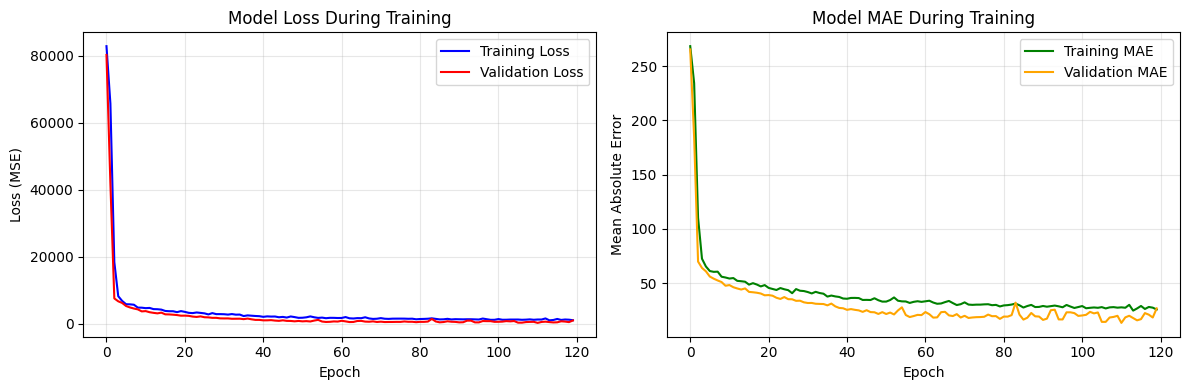

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE', color='green')
plt.plot(history.history['val_mae'], label='Validation MAE', color='orange')
plt.title('Model MAE During Training')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Model Visual Comparisions

Sample predictions comparison:
       Actual  Random_Forest  Neural_Network
0  296.059897     286.048559      263.325653
1  233.602843     250.891100      218.688828
2  317.786750     311.501478      291.007874
3  398.272591     399.743823      360.862030
4  299.352893     268.687860      246.625336
5  359.695142     354.121115      308.647949
6   27.352220      36.963876       22.351292
7  104.634311     111.140489      102.148621
8  429.953592     429.407995      388.865143
9  157.501327     161.257548      149.424271


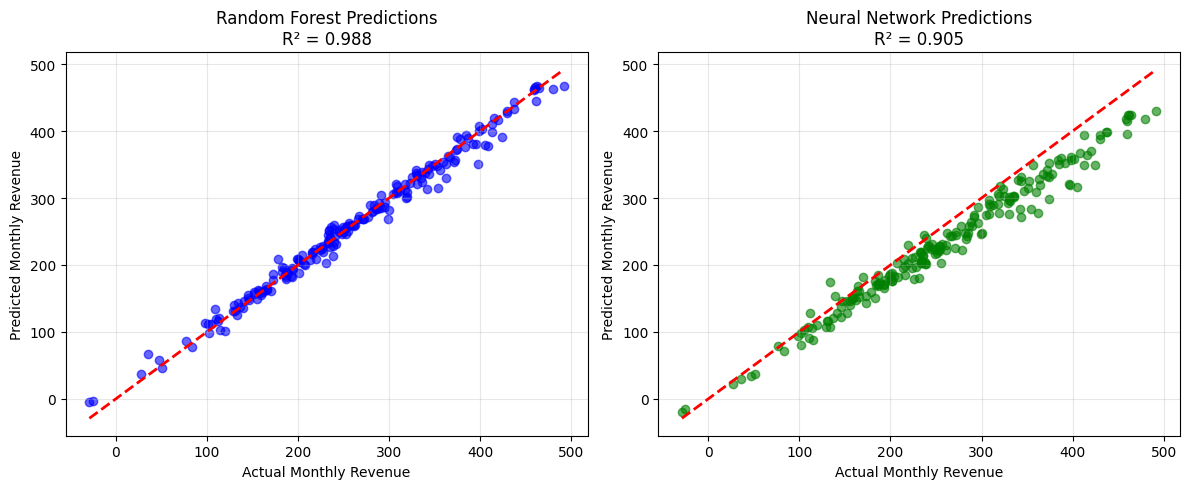

In [ ]:
comparison_df = pd.DataFrame({
    'Actual_Rating': y_test.values,
    'Random_Forest': rf_predictions,
    'Neural_Network': nn_predictions
})

print("Sample rating predictions comparison:")
print(comparison_df.head(10))

# Plot predictions vs actual
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, rf_predictions, alpha=0.6, color='blue')
plt.plot([1, 5], [1, 5], 'r--', lw=2)
plt.xlabel('Actual Restaurant Rating')
plt.ylabel('Predicted Restaurant Rating')
plt.title(f'Random Forest Rating Predictions\nR² = {rf_r2:.3f}')
plt.xlim(1, 5)
plt.ylim(1, 5)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(y_test, nn_predictions, alpha=0.6, color='green')
plt.plot([1, 5], [1, 5], 'r--', lw=2)
plt.xlabel('Actual Restaurant Rating')
plt.ylabel('Predicted Restaurant Rating')
plt.title(f'Neural Network Rating Predictions\nR² = {nn_r2:.3f}')
plt.xlim(1, 5)
plt.ylim(1, 5)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Error analysis

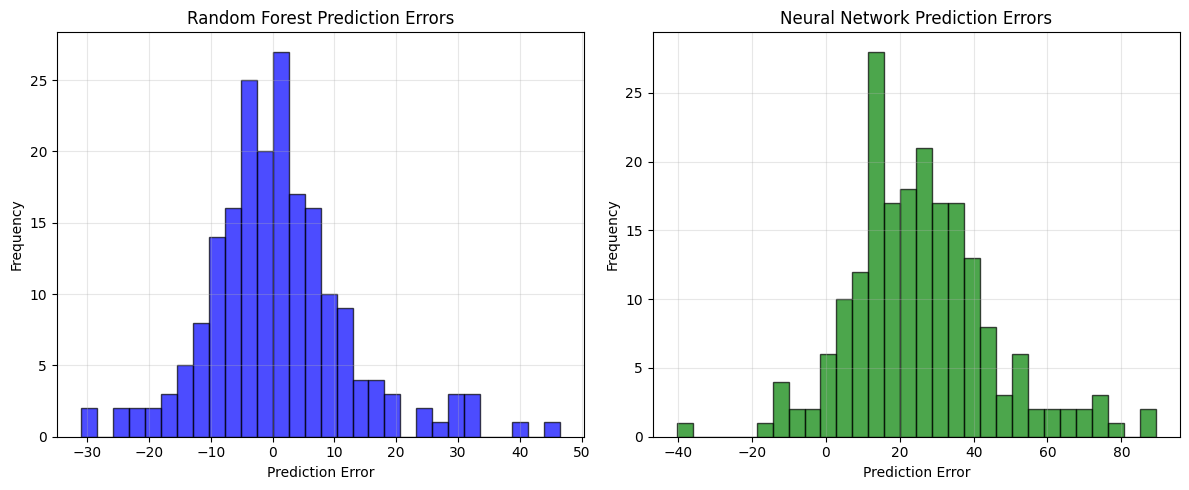

In [ ]:
# Calculate errors
rf_errors = y_test - rf_predictions
nn_errors = y_test - nn_predictions

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(rf_errors, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Random Forest Rating Prediction Errors')
plt.xlabel('Prediction Error (stars)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(nn_errors, bins=30, alpha=0.7, color='green', edgecolor='black')
plt.title('Neural Network Rating Prediction Errors')
plt.xlabel('Prediction Error (stars)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Final Model Comparision

In [ ]:
results_summary = pd.DataFrame({
    'Model': ['Random Forest', 'Neural Network'],
    'RMSE': [rf_rmse, nn_rmse],
    'MAE': [rf_mae, nn_mae],
    'R² Score': [rf_r2, nn_r2]
})

print("Rating Prediction Model Performance Comparison:")
print(results_summary.round(4))

# Determine best model
if rf_r2 > nn_r2:
    best_model = "Random Forest"
    best_score = rf_r2
else:
    best_model = "Neural Network"
    best_score = nn_r2

print(f"\n🏆 Best performing model: {best_model}")
print(f"Best R² Score: {best_score:.4f}")


Model Performance Comparison:
            Model     RMSE      MAE  R² Score
0   Random Forest  11.6231   8.3221    0.9876
1  Neural Network  32.1507  26.9730    0.9054

Best model: Random Forest
Best R² Score: 0.9876


Predict  Restaurannt rating detecting

In [ ]:
def predict_restaurant_rating(customers, menu_price, marketing_spend, avg_spending, promotions, revenue, service_quality, food_quality):
    """
    Predict restaurant rating based on input parameters
    """
    # Create feature engineering for new input
    overall_quality = (food_quality + service_quality) / 2
    value_for_money = avg_spending / (menu_price + 1)
    customer_loyalty = customers * np.log1p(avg_spending)
    service_efficiency = customers / (service_quality + 1)
    food_value_score = food_quality / (menu_price / 10 + 1)
    promotion_quality_boost = promotions * overall_quality
    revenue_per_customer = revenue / (customers + 1)
    marketing_per_customer = marketing_spend / (customers + 1)
    quality_consistency = 5 - abs(food_quality - service_quality)
    
    # Create dataframe with all features
    input_data = pd.DataFrame({
        'Number_of_Customers': [customers],
        'Menu_Price': [menu_price],
        'Marketing_Spend': [marketing_spend],
        'Average_Customer_Spending': [avg_spending],
        'Promotions': [promotions],
        'Monthly_Revenue': [revenue],
        'Service_Quality': [service_quality],
        'Food_Quality': [food_quality],
        'overall_quality': [overall_quality],
        'value_for_money': [value_for_money],
        'customer_loyalty': [customer_loyalty],
        'service_efficiency': [service_efficiency],
        'food_value_score': [food_value_score],
        'promotion_quality_boost': [promotion_quality_boost],
        'revenue_per_customer': [revenue_per_customer],
        'marketing_per_customer': [marketing_per_customer],
        'quality_consistency': [quality_consistency]
    })
    
    # Scale the data
    input_scaled = scaler.transform(input_data)
    
    # Make predictions
    rf_pred = np.clip(rf_model.predict(input_data)[0], 1, 5)
    nn_pred_scaled = model.predict(input_scaled)[0][0]
    nn_pred = np.clip((nn_pred_scaled * 4) + 1, 1, 5)
    avg_pred = (rf_pred + nn_pred) / 2
    
    return rf_pred, nn_pred, avg_pred

In [ ]:
print("Choose your input method:")
print("1. Use sample restaurant data")
print("2. Enter custom restaurant data")

# You can change this to 2 for custom input, or 1 for sample
input_choice = 1  # Change this to 2 if you want custom input

if input_choice == 1:
    print("\n⭐ Using Sample Restaurant Data for Rating Prediction:")
    
    # Sample restaurant examples
    sample_restaurants = [
        {"name": "Cozy Italian Bistro", "customers": 45, "menu_price": 28.5, "marketing": 8.2, "avg_spend": 32.0, "promotions": 1, "revenue": 350, "service": 4.2, "food": 4.5},
        {"name": "Fast Food Corner", "customers": 85, "menu_price": 15.8, "marketing": 15.0, "avg_spend": 18.5, "promotions": 1, "revenue": 420, "service": 3.5, "food": 3.8},
        {"name": "Luxury Fine Dining", "customers": 25, "menu_price": 45.2, "marketing": 5.5, "avg_spend": 48.0, "promotions": 0, "revenue": 280, "service": 4.8, "food": 4.9},
        {"name": "Family Restaurant", "customers": 55, "menu_price": 22.0, "marketing": 11.8, "avg_spend": 25.5, "promotions": 1, "revenue": 380, "service": 4.0, "food": 4.1}
    ]
    
    for i, restaurant in enumerate(sample_restaurants, 1):
        print(f"\n--- Restaurant {i}: {restaurant['name']} ---")
        print(f"Customers: {restaurant['customers']}")
        print(f"Menu Price: ${restaurant['menu_price']}")
        print(f"Marketing Spend: ${restaurant['marketing']}")
        print(f"Avg Customer Spending: ${restaurant['avg_spend']}")
        print(f"Promotions: {'Yes' if restaurant['promotions'] else 'No'}")
        print(f"Monthly Revenue: ${restaurant['revenue']}")
        print(f"Service Quality: {restaurant['service']}/5")
        print(f"Food Quality: {restaurant['food']}/5")
        
        rf_pred, nn_pred, avg_pred = predict_restaurant_rating(
            restaurant['customers'], restaurant['menu_price'], restaurant['marketing'],
            restaurant['avg_spend'], restaurant['promotions'], restaurant['revenue'],
            restaurant['service'], restaurant['food']
        )
        
        print(f"\n⭐ Rating Predictions:")
        print(f"Random Forest: {rf_pred:.2f}/5 stars")
        print(f"Neural Network: {nn_pred:.2f}/5 stars")
        print(f"Final Prediction: {avg_pred:.2f}/5 stars")
        print("-" * 50)

elif input_choice == 2:
    print("\n✏️ Enter Custom Restaurant Data for Rating Prediction:")
    print("Please enter the following information:")
    
    # Get custom input from user
    try:
        customers = int(input("Number of Customers (10-99): "))
        menu_price = float(input("Average Menu Price ($10-50): "))
        marketing = float(input("Marketing Spend ($0-20): "))
        avg_spend = float(input("Average Customer Spending ($10-50): "))
        promotions = int(input("Promotions (0 for No, 1 for Yes): "))
        revenue = float(input("Monthly Revenue ($50-500): "))
        service_quality = float(input("Service Quality (1-5): "))
        food_quality = float(input("Food Quality (1-5): "))
        
        print(f"\n--- Your Custom Restaurant ---")
        print(f"Customers: {customers}")
        print(f"Menu Price: ${menu_price:.2f}")
        print(f"Marketing Spend: ${marketing:.2f}")
        print(f"Avg Customer Spending: ${avg_spend:.2f}")
        print(f"Promotions: {'Yes' if promotions else 'No'}")
        print(f"Monthly Revenue: ${revenue:.2f}")
        print(f"Service Quality: {service_quality}/5")
        print(f"Food Quality: {food_quality}/5")
        
        rf_pred, nn_pred, avg_pred = predict_restaurant_rating(
            customers, menu_price, marketing, avg_spend, promotions, revenue,
            service_quality, food_quality
        )
        
        print(f"\n⭐ Rating Predictions for Your Restaurant:")
        print(f"Random Forest: {rf_pred:.2f}/5 stars")
        print(f"Neural Network: {nn_pred:.2f}/5 stars")
        print(f"Final Prediction: {avg_pred:.2f}/5 stars")
        
    except ValueError:
        print("❌ Invalid input! Please enter numbers only.")
    except:
        print("❌ Error occurred. Please check your inputs.")

Choose your input method:
1. Use sample restaurant data
2. Enter custom restaurant data



✏️ Enter Custom Restaurant Data:
Please enter the following information:

--- Your Custom Restaurant ---
Customers: 55
Menu Price: $40.00
Marketing Spend: $20.00
Avg Customer Spending: $30.00
Promotions: Yes
Reviews: 34
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step

💰 Revenue Predictions for Your Restaurant:
Random Forest: $299.97
Neural Network: $280.23
Final Prediction: $290.10
